In [25]:
from google.colab import files
import pandas as pd

# Fazer o upload do arquivo
uploaded = files.upload()

Saving Salary_dataset.csv to Salary_dataset.csv
Saving sales data-set.csv to sales data-set (1).csv


In [9]:
# Ler o arquivo CSV
df_sales = pd.read_csv('sales data-set.csv')

data = df_sales

# Display the first 5 rows and the column names
data_head = data.head()
data_columns = data.columns.tolist()

In [10]:
data_columns

['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday']

In [11]:
data_head

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [15]:
# Converty the Date column to datetime format for acurate comparison
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# Get the minimum and maximum of the Date column
date_min = data['Date'].min()
date_max = data['Date'].max()

date_min, date_max

(Timestamp('2010-02-05 00:00:00'), Timestamp('2012-10-26 00:00:00'))

In [16]:
# Extract the month and year for each date
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

In [17]:
monthly_sales = data.groupby(['Year', 'Month'])['Weekly_Sales'].sum().reset_index()

In [18]:
monthly_sales

,Year,Month,Weekly_Sales
0,2010,2,1.903330e+08
1,2010,3,1.819198e+08
2,2010,4,2.314124e+08
3,2010,5,1.867109e+08
4,2010,6,1.922462e+08
5,2010,7,2.325801e+08
6,2010,8,1.876401e+08
7,2010,9,1.772679e+08
8,2010,10,2.171618e+08
9,2010,11,2.028534e+08


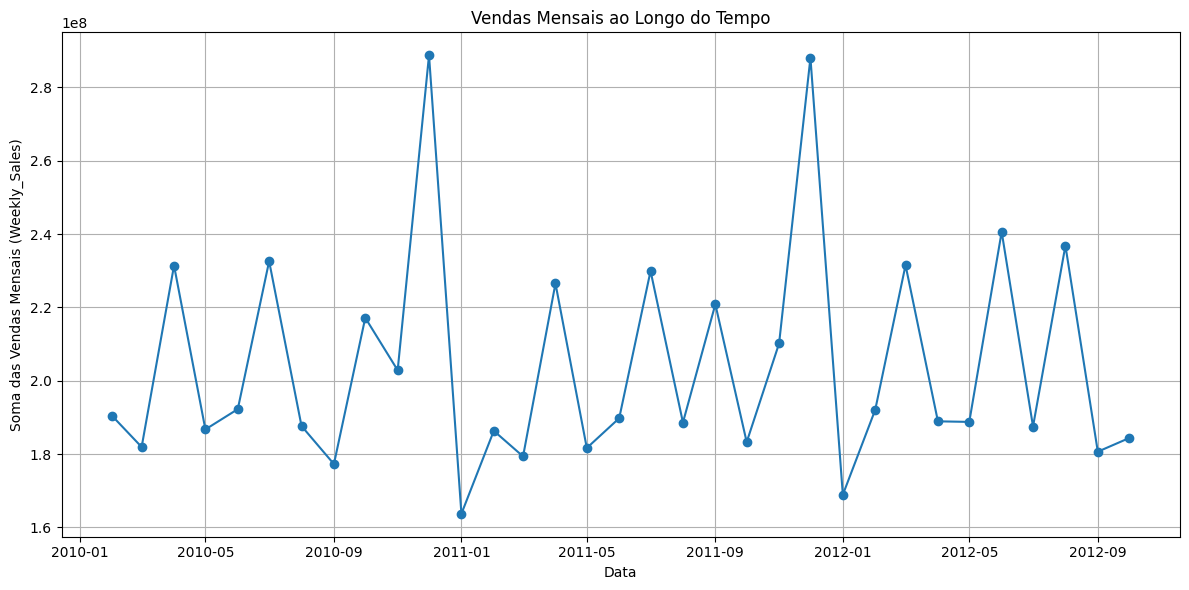

In [19]:
import matplotlib.pyplot as plt

# Create a datetime column for the montlhy_sales dataset
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(day=1))

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Date'], monthly_sales['Weekly_Sales'], marker='o')
plt.title('Vendas Mensais ao Longo do Tempo')
plt.ylabel('Soma das Vendas Mensais (Weekly_Sales)')
plt.xlabel('Data')
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
filtered_data = data[(data['Month'] == 2) & (data['Year'] == 2010)]

In [22]:
# Calculate the sum of Weekly_Sales for the filtered data
sum_weekly_sales_filtered = filtered_data['Weekly_Sales'].sum()
sum_weekly_sales_filtered

np.float64(190332983.04000002)

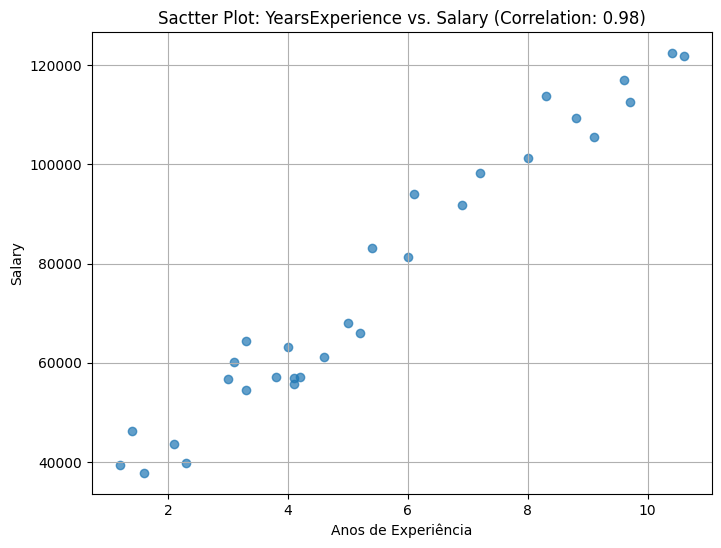

In [38]:
# Calculating correlation
df_salaries = pd.read_csv('Salary_dataset.csv')
salary_data = df_salaries
correlation = salary_data['YearsExperience'].corr(salary_data['Salary'])

# Scatter plt to visualize linearity
plt.figure(figsize=(8, 6))
plt.scatter(salary_data['YearsExperience'], salary_data['Salary'], alpha=0.7)
plt.title(f'Sactter Plot: YearsExperience vs. Salary (Correlation: {correlation:.2f})')
plt.ylabel('Salary')
plt.xlabel('Anos de Experiência')
plt.grid(True)
plt.show()

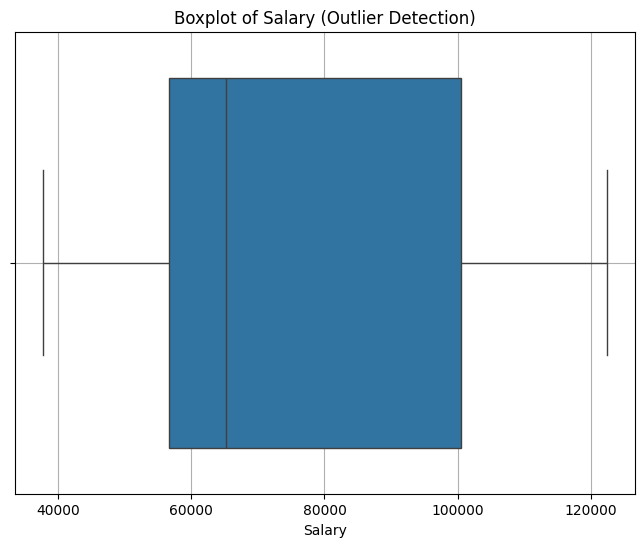

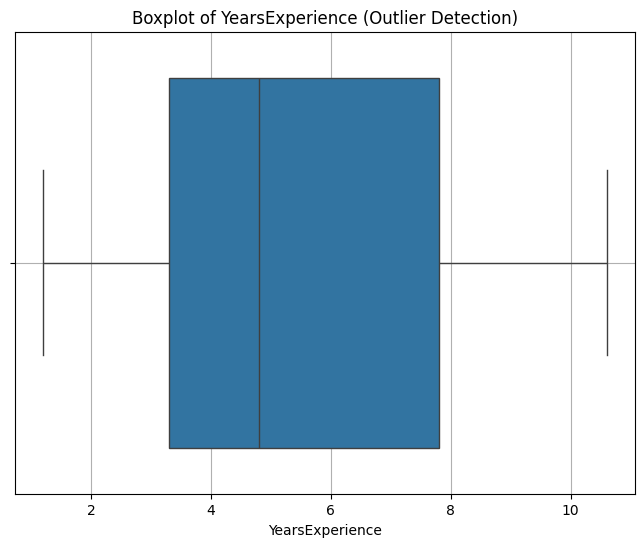

(Empty DataFrame
 Columns: [Unnamed: 0, YearsExperience, Salary]
 Index: [],
 Empty DataFrame
 Columns: [Unnamed: 0, YearsExperience, Salary]
 Index: [])

In [43]:
import seaborn as sns

# Boxplot to identify outliers in Salary
plt.figure(figsize=(8, 6))
sns.boxplot(x=salary_data['Salary'])
plt.title('Boxplot of Salary (Outlier Detection)')
plt.xlabel('Salary')
plt.grid(True)
plt.show()

#Bowplot to identify outliers in YearsEperience
plt.figure(figsize=(8, 6))
sns.boxplot(x=salary_data['YearsExperience'])
plt.title('Boxplot of YearsExperience (Outlier Detection)')
plt.xlabel('YearsExperience')
plt.grid(True)
plt.show()

# Identify outliers using IQR for salary
q1_exp = salary_data['Salary'].quantile(0.25)
q3_exp = salary_data['Salary'].quantile(0.75)
iqr_exp = q3_exp - q1_exp
lower_bound_exp = q1_exp - 1.5 * iqr_exp
upper_bound_exp = q3_exp + 1.5 * iqr_exp
outliers_salary = salary_data[(salary_data['Salary'] < lower_bound_exp) |
                               (salary_data['Salary'] > upper_bound_exp)]

# Identify outliers using IQR for YearsExperience
q1_exp = salary_data['YearsExperience'].quantile(0.25)
q3_exp = salary_data['YearsExperience'].quantile(0.75)
iqr_exp = q3_exp - q1_exp
lower_bound_exp = q1_exp - 1.5 * iqr_exp
upper_bound_exp = q3_exp + 1.5 * iqr_exp
outliers_exp = salary_data[(salary_data['YearsExperience'] < lower_bound_exp) |
                               (salary_data['YearsExperience'] > upper_bound_exp)]

outliers_salary, outliers_exp

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Defining the feature (X) and target (y)
X = salary_data[['YearsExperience']]
y = salary_data['Salary']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Model coefficients
coefficients = model.coef_
intercept = model.intercept_

mse, r2, coefficients, intercept

(49830096.855908394,
 0.9024461774180497,
 array([9423.81532303]),
 np.float64(24380.201479473704))

In [49]:
# Predicting the salary for 22 years of experience
years_experience = 22
predicted_salary = model.predict([[years_experience]])[0]
predicted_salary = round(predicted_salary, 2)
print(f"Predicted salary for {years_experience} years of experience: ${predicted_salary}")

Predicted salary for 22 years of experience: $231704.14


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Código refatorado incluindo:

✅ Organização em funções reutilizáveis.

✅ Comentários e docstrings.

✅ Remoção de redundâncias.

✅ Padronização de nomes de variáveis.

✅ Estrutura sequencial e clara.

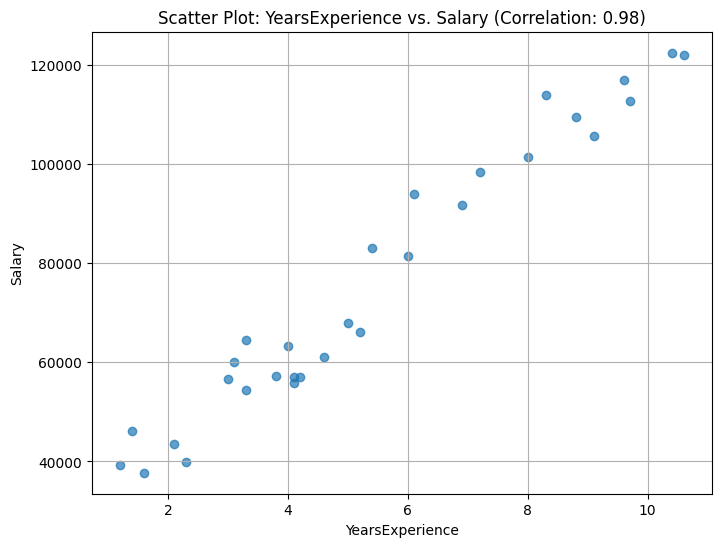

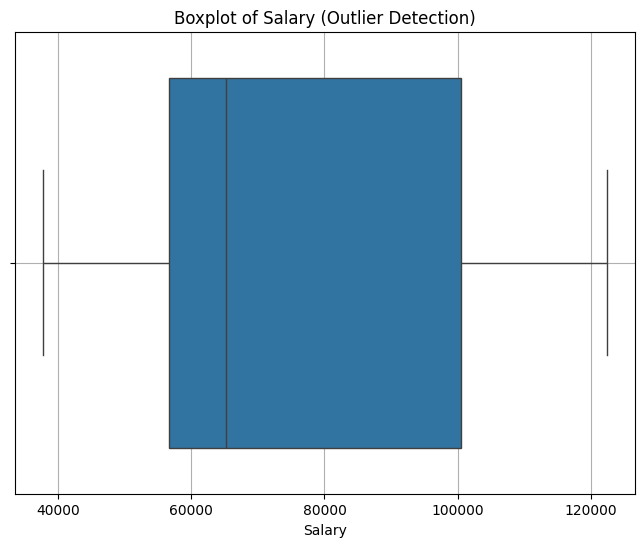

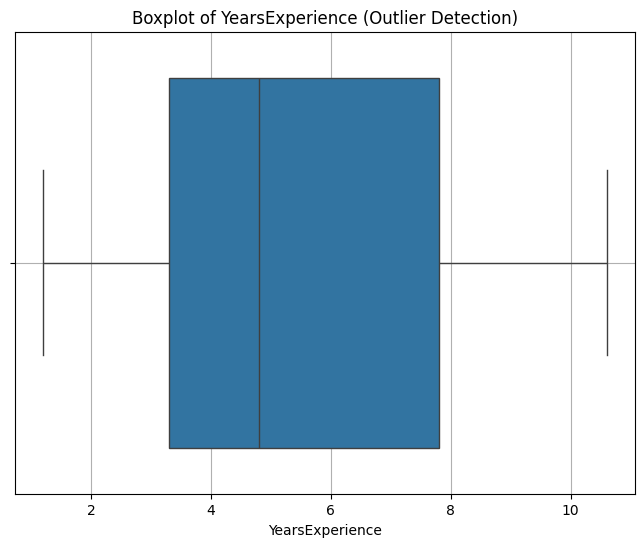

Outliers em Salary:
Series([], Name: Salary, dtype: float64)
Outliers em YearsExperience:
Series([], Name: YearsExperience, dtype: float64)
MSE: 49830096.86, R²: 0.90
Coeficientes: [9423.81532303], Intercepto: 24380.201479473704
Predicted salary for 22 years of experience: $231704.14


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def load_data(filepath: str) -> pd.DataFrame:
    """Carrega o dataset a partir de um arquivo CSV."""
    return pd.read_csv(filepath)

def calculate_correlation(data: pd.DataFrame, col1: str, col2: str) -> float:
    """Calcula a correlação entre duas colunas."""
    return data[col1].corr(data[col2])

def plot_scatter(data: pd.DataFrame, x_col: str, y_col: str, correlation: float) -> None:
    """Plota um gráfico de dispersão entre duas variáveis com a correlação."""
    plt.figure(figsize=(8, 6))
    plt.scatter(data[x_col], data[y_col], alpha=0.7)
    plt.title(f'Scatter Plot: {x_col} vs. {y_col} (Correlation: {correlation:.2f})')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(True)
    plt.show()

def plot_boxplot(data: pd.Series, title: str) -> None:
    """Plota um boxplot para uma série de dados."""
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data)
    plt.title(title)
    plt.xlabel(data.name)
    plt.grid(True)
    plt.show()

def detect_outliers_iqr(data: pd.Series) -> pd.DataFrame:
    """Identifica outliers em uma série utilizando o método IQR."""
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return data[(data < lower_bound) | (data > upper_bound)]

def train_linear_regression(X: pd.DataFrame, y: pd.Series):
    """Treina um modelo de regressão linear e retorna o modelo e as previsões."""
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return model, X_test, y_test, y_pred

def evaluate_model(y_test: pd.Series, y_pred: pd.Series) -> tuple:
    """Avalia o modelo calculando MSE e R²."""
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

def predict_salary(model: LinearRegression, years_experience: float) -> float:
    """Prediz o salário baseado em anos de experiência."""
    prediction = model.predict([[years_experience]])[0]
    return round(prediction, 2)

def main():
    # Carregamento de dados
    data = load_data('Salary_dataset.csv')

    # Cálculo da correlação
    correlation = calculate_correlation(data, 'YearsExperience', 'Salary')

    # Gráficos
    plot_scatter(data, 'YearsExperience', 'Salary', correlation)
    plot_boxplot(data['Salary'], 'Boxplot of Salary (Outlier Detection)')
    plot_boxplot(data['YearsExperience'], 'Boxplot of YearsExperience (Outlier Detection)')

    # Detecção de outliers
    outliers_salary = detect_outliers_iqr(data['Salary'])
    outliers_experience = detect_outliers_iqr(data['YearsExperience'])

    print(f"Outliers em Salary:\n{outliers_salary}")
    print(f"Outliers em YearsExperience:\n{outliers_experience}")

    # Regressão Linear
    X = data[['YearsExperience']]
    y = data['Salary']

    model, X_test, y_test, y_pred = train_linear_regression(X, y)

    # Avaliação do modelo
    mse, r2 = evaluate_model(y_test, y_pred)
    print(f"MSE: {mse:.2f}, R²: {r2:.2f}")
    print(f"Coeficientes: {model.coef_}, Intercepto: {model.intercept_}")

    # Previsão para 22 anos de experiência
    years_experience = 22
    predicted_salary = predict_salary(model, years_experience)
    print(f"Predicted salary for {years_experience} years of experience: ${predicted_salary}")

if __name__ == "__main__":
    main()

✅ Principais melhorias:
Modularização: cada bloco de funcionalidade virou uma função.

Tipagem de variáveis e funções para maior clareza.

Comentários e docstrings padrão PEP257.

Nomes de variáveis e funções mais descritivos e legíveis.

Remoção de redundâncias (evitando, por exemplo, repetir os cálculos de IQR).

Impressões com formatação clara e objetiva.

Estrutura main() para organização e eventual expansão.